In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('reviews.tsv', sep='\t')

In [3]:
df.head()

,permalink,rating,review_text
0,1000095379,4.0,"Вкусная питца, естт летнее кафе, доставка, при..."
1,1000095379,1.0,Думал можно днём с детьми посидеть на открытой...
2,1000095379,4.0,"Есть веранда, вкусная пицца, делают по половин..."
3,1000095379,1.0,Уже второй раз забивают на заказ
4,1000095379,5.0,Любимая пиццерия! 👍


In [4]:
df.shape

(328645, 3)

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import re
from nltk import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# remove the rows where rating is zero
df = df.drop(df[(df["rating"] == 0.0)].index)

In [9]:
df.shape

(328528, 3)

In [10]:
# remove all the null values
df.dropna(inplace=True)

In [11]:
df.shape

(328368, 3)

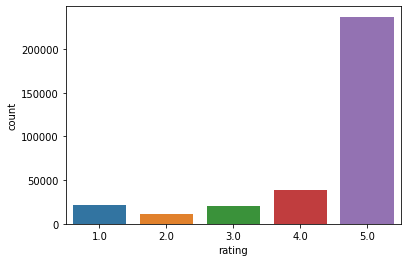

In [12]:
sns.countplot(df['rating'])

In [13]:
nltk.download("wordnet")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yulya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yulya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yulya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\yulya\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [14]:
lemmatizer = WordNetLemmatizer()

In [15]:
# Stop words
stop_words = set(stopwords.words("russian"))
print(stop_words)

{'впрочем', 'сейчас', 'под', 'мы', 'потом', 'вас', 'если', 'быть', 'был', 'уже', 'есть', 'один', 'наконец', 'более', 'этот', 'за', 'со', 'чего', 'ну', 'до', 'чтобы', 'их', 'всю', 'над', 'опять', 'себе', 'от', 'ни', 'почти', 'ее', 'же', 'из', 'как', 'тогда', 'но', 'об', 'разве', 'вдруг', 'куда', 'или', 'была', 'только', 'иногда', 'три', 'им', 'где', 'много', 'вот', 'при', 'даже', 'больше', 'теперь', 'у', 'том', 'какой', 'будет', 'эти', 'бы', 'и', 'ведь', 'между', 'во', 'зачем', 'всего', 'можно', 'они', 'нибудь', 'тот', 'нас', 'хорошо', 'через', 'ты', 'сам', 'по', 'для', 'того', 'этом', 'мой', 'я', 'тут', 'тебя', 'хоть', 'а', 'его', 'на', 'там', 'не', 'вам', 'него', 'с', 'так', 'все', 'были', 'что', 'два', 'тоже', 'в', 'себя', 'ним', 'никогда', 'перед', 'мне', 'о', 'всегда', 'нет', 'еще', 'после', 'он', 'свою', 'чем', 'тем', 'уж', 'к', 'совсем', 'потому', 'она', 'меня', 'без', 'ж', 'про', 'этой', 'было', 'здесь', 'другой', 'вы', 'чуть', 'эту', 'лучше', 'всех', 'раз', 'ней', 'ли', 'то', '

In [16]:
def clean_text(text):
    '''
    Function to clean the text data of the crawled web-pages 
    '''
    # Removing extra spaces
    text = re.sub(" +", " ", text)
    # Make the alphsbets lower
    text = text.lower()
    # Lemmatizating the words
    text = [lemmatizer.lemmatize(token) for token in word_tokenize(text)]
    # Removing the stop words.
    text = [word for word in text if not word in stop_words]
    # removing the all single letter words
    text = [i for i in text if len(i)>1]
    # join the text into the string
    text = " ".join(text)
    return text

In [17]:
df['clean_text'] = df['review_text'].apply(clean_text)
df.head()

,permalink,rating,review_text,clean_text
0,1000095379,4.0,"Вкусная питца, естт летнее кафе, доставка, при...",вкусная питца естт летнее кафе доставка приемл...
1,1000095379,1.0,Думал можно днём с детьми посидеть на открытой...,думал днём детьми посидеть открытой площадке т...
2,1000095379,4.0,"Есть веранда, вкусная пицца, делают по половин...",веранда вкусная пицца делают половине паковка ...
3,1000095379,1.0,Уже второй раз забивают на заказ,второй забивают заказ
4,1000095379,5.0,Любимая пиццерия! 👍,любимая пиццерия


In [18]:
df['clean_text']

0         вкусная питца естт летнее кафе доставка приемл...
1         думал днём детьми посидеть открытой площадке т...
2         веранда вкусная пицца делают половине паковка ...
3                                     второй забивают заказ
4                                          любимая пиццерия
                                ...                        
328640                                  очень вкусная пицца
328641    лучший борщ роза хутор большая порция теплый х...
328642                               понравилось пицца норм
328643    обслуживание нормальное соотношение цена/качес...
328644    ооочень долгое обслуживание необоснованно высо...
Name: clean_text, Length: 328368, dtype: object

In [35]:
#vectorization is a further step
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [20]:
corpus = df['clean_text']
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1,2))
tfidf.fit(corpus)

TfidfVectorizer(max_features=1000, ngram_range=(1, 2))

In [21]:
X = tfidf.transform(corpus)
y = df['rating']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [30]:
X_test.shape

(65674, 1000)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree, metrics
from sklearn.multiclass import OneVsRestClassifier

In [31]:
#building model and fitting it to our train data
DT = DecisionTreeClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, random_state=123)
clf_DT = OneVsRestClassifier(DT).fit(X_train, y_train)

In [32]:
#prediction
y_pred = clf_DT.predict(X_test)

In [33]:
confusion_matrix(y_test, y_pred)

array([[ 1233,   113,   110,    91,  2850],
       [  345,    69,    85,    67,  1639],
       [  277,    71,   161,   223,  3389],
       [  136,    44,   135,   501,  6887],
       [  181,    45,   105,   385, 46532]], dtype=int64)

In [34]:
accuracy_score(y_test, y_pred)

0.7384353016414411